# Getting started with Pytorch for Deep learning

## **Introduction**

There has been significant progress in computer vision because of deep learning in recent years. This helped to improve the performance of various tasks such as image recognition, object detection, image segmentation, and image generation. Deep learning frameworks and libraries have played a major role in this process. PyTorch, as a deep learning library, has emerged since 2016 and gained great attention among deep learning practitioners due to its flexibility and ease of use. 

There are several frameworks that practitioners use to build deep learning algorithms. In this book, we will use the latest version of PyTorch 1.0 to develop and train various deep learning models. PyTorch is a deep learning framework developed by Facebook's artificial intelligence research group. It provides flexibility and ease of use at the same. If you are familiar with other deep learning frameworks, you will find PyTorch very enjoyable.

In this chapter, we will provide a review of deep learning concepts and their implementation using PyTorch 1.0. We will cover the following recipes:

* Installing software tools and packages 
* Working with PyTorch tensors
* Loading and processing data
* Building models
* Defining the loss function and optimizer
* Training and evaluation

Developing deep learning algorithms is comprised of two steps: training and deployment. In the training step, we use training data to train a model or network. In the deployment step, we deploy the trained model to predict the target values for new inputs.

To train deep learning algorithms, the following ingredients are required:

* Training data (inputs and targets) 
* The model (also called the network) 
* The loss function (also called the objective function or criterion)
* The optimizer
You can see the interaction between these elements in the following diagram:

![Alt text](elements_interaction.png)

The training process for deep learning algorithms is an iterative process. In each iteration, we select a batch of training data. Then, we feed the data to the model to get the model output. After that, we calculate the loss value. Next, we compute the gradients of the loss function with respect to the model parameters (also known as the weights). Finally, the optimizer updates the parameters based on the gradients. This loop continues. We also use a validation dataset to track the model's performance during training. We stop the training process when the performance plateaus.

## **Verifying the installation**

In [26]:
import torch
torch.__version__

'1.11.0'

In [27]:
import torchvision
torchvision.__version__

'0.12.0'

In [28]:
torch.cuda.is_available()

True

In [29]:
torch.cuda.device_count()

1

In [30]:
torch.cuda.current_device()

0

In [31]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1050'

## **Working with Pytorch tensors**

PyTorch is built on tensors. A PyTorch tensor is an $n$-dimensional array, similar to NumPy arrays.

If you are familiar with NumPy, you will see a similarity in the syntax when working with tensors, as shown in the following table:

| Numpy Arrays          | Pytorch tensors           | Description                       |
| --------------------- | ------------------------- | --------------------------------- |
| `numpy.ones()`        | `torch.ones()`            | Create an array of ones           |
| `numpy.zeros()`       | `torch.zeros()`           | Create an arry of zeros           |
| `numpy.random.rand()` | `torch.rand()`            | Create a random array             |
| `numpy.array()`       | `torch.tensor()`          | Create an array from given values |
| `x.shape`             | `x.shape()` or `x.size()` | Get an array shape                |


### **How to do it**

#### **Defining the tensor data type**

The default tensor data type is `torch.float32`. This is the most used data type for tensor operations. Let's take a look:

In [32]:
# 1 Define a tensor with a default data type:
x = torch.ones(2, 2)
print(x)
print(x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


In [33]:
# 2 Specify the data type when defining a tensor:
# Define a tensor with specific data type
x = torch.ones(2, 3, dtype=torch.int8)
print(x)
print(x.dtype)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int8)
torch.int8


#### **Changing the tensor's data type**

We can change a tensor's data type using the `.type` method:

In [34]:
# 1 Define a tensor with the torch.uint8 type
x = torch.ones(1, dtype=torch.uint8)
print(x)

tensor([1], dtype=torch.uint8)


In [35]:
# 2 Change the tensor data type
x = x.type(torch.float)
print(x.dtype)

torch.float32


#### **Converting tensors into numpy arrays** 

We can easily convert PyTorch tensors into numpy arrays. Let's take a look

In [36]:
# 1 Define a tensor
x = torch.rand(2, 3)
print(x)
print(x.dtype)

tensor([[0.5754, 0.1283, 0.7912],
        [0.3042, 0.6715, 0.5209]])
torch.float32


In [37]:
# 2 Convert the tensor inot a numpy array
y = x.numpy()
print(y)
print(y.dtype)

[[0.575415   0.12833732 0.7912468 ]
 [0.30416185 0.67146844 0.52087986]]
float32


#### **Converting numpy arrays into tensors**

We can also convert NumPy arrays into PyTorch tensors

In [38]:
# 1 Define a numpt array
import numpy as np
x = np.zeros((2, 2), dtype=np.float32)
print(x)
print(x.dtype)

[[0. 0.]
 [0. 0.]]
float32


In [39]:
# 2 Convert the numpy array into a pytorch tensor
y = torch.from_numpy(x)
print(y)
print(y.dtype)

tensor([[0., 0.],
        [0., 0.]])
torch.float32


#### **Moving tensors between devices**

By default, PyTorch tensors are stored on the CPU. PyTorch tensors can be utilized on a GPU to speed up computing. This is the main advantage of tensors compared to NumPy arrays. To get this advantage, we need to move the tensors to the CUDA device. We can move tensors onto any device using the `.to` method:

In [40]:
# 1 Define a tensor on the CPU
x = torch.tensor([1.5, 2])
print(x)
print(x.device)

tensor([1.5000, 2.0000])
cpu


In [41]:
# 2 Define a CUDA device
if torch.cuda.is_available():
    device = torch.device('cuda:0')

# 3 Move the tensor onto the CUDA device
x = x.to(device)
print(x)

tensor([1.5000, 2.0000], device='cuda:0')


In [42]:
# 4 Similarly, we can move tensors to CPU
# define a cpu device
device = torch.device("cpu")
x = x.to(device) 
print(x)
print(x.device)

tensor([1.5000, 2.0000])
cpu


In [43]:
# 5 We can also directly create a tensor on any device:
# define a tensor on device
device = torch.device("cuda:0")
x = torch.ones(2,2, device=device) 
print(x)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')


### **How it works**

First, we defined a tensor, obtained the tensor type, and changed its type. Then, we converted PyTorch tensors into NumPy arrays and vice versa. We also moved tensors between the CPU and CUDA devices. Next, we showed you how to change a tensor data type using the `.type` method. Then, we showed how to convert PyTorch tensors into NumPy arrays using the `.numpy` method. 

After that, we showed you how to convert a NumPy array into a PyTorch tensor using the `.from_numpy(x)` method. Then, we showed you how to move tensors from a CPU device to a GPU device and vice versa, using the `.to` method. As you have seen, if you do not specify the device, the tensor will be hosted on the CPU device.

## **Loading and processing data**

In most cases, it's assumed that we **receive data in three groups**: **training**, **validation**, and **test**. We use the **training dataset to train the model**. The **validation dataset is used to track the model's performance during training**. We use the **test dataset for the final evaluation of the model**. The target values of the test dataset are usually hidden from us. **We need at least one training dataset and one validation dataset to be able to develop and train a model**. Sometimes, we receive only one dataset. In such cases, we can split the dataset into two or three groups.

Each dataset is comprised of inputs and targets. It is common to represent the inputs with `x` or `X` and the targets with `y` or `Y`. We add the suffixes `train`, `val`, and `test` to distinguish each dataset.

In this recipe, we will learn about PyTorch data tools. We can use these tools to load and process data. 


### **How to do it**

#### **Loading the dataset**

The PyTorch `torchvision` package provides multiple popular datasets. Let's load MNIST dataset from `torchvision`

In [44]:
# 1 First, we will load the MNIST training dataset
from torchvision import datasets
# path to store the data and/or load from
path2data = '../data'

# loading training data
train_data = datasets.MNIST(path2data, train=True, download=True)

# 2 Then we will extract the input data and target labels
# extract data and targets
X_train, y_train = train_data.data, train_data.targets
print(X_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [45]:
# 3 Next, we will load the MNIST test dataset:
# loading validation data
val_data = datasets.MNIST(path2data, train=False, download=True)

# 4 Then, we will extract the input data and target labels:
# extract data and targets
X_val, y_val = val_data.data, val_data.targets
print(X_val.shape)
print(y_val.shape)

# 5 After that, we will add a new dimension to the tensors:
# add a dimension to tensor to become B*C*H*W
if len(X_train.shape) == 3:
    X_train = X_train.unsqueeze(1)
print(X_train.shape)

if len(X_val.shape)==3:
    X_val = X_val.unsqueeze(1)
print(X_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])
torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


Now, let's display a few sample images.

torch.Size([3, 152, 242])


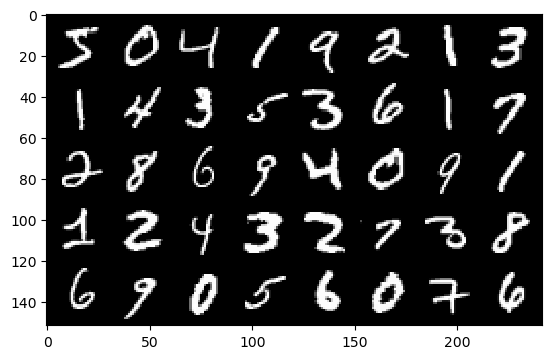

In [46]:
# 6 Next, we will import the required packages:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 7 Then, we will define a helper function to display tensors as images:
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    # Convert to H*W*C shape
    npimg_tr=np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr, interpolation='nearest')

# 8 Next, we will create a grid of images and display them:
# make a grid of 40 images, 8 images per row
X_grid = utils.make_grid(X_train[:40], nrow=8, padding=2)
print(X_grid.shape)

# call helper function
show(X_grid)

#### **Data transformation** 

Image transformation (also called augmentation) is an effective technique that's used to improve a model's performance. The `torchvision` package provides common image transformations through the transform class. Let's take a look:

Text(0.5, 1.0, 'transformed')

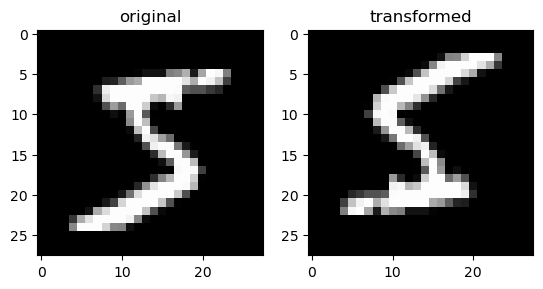

In [47]:
# 1 Let's define a transform class in order to apply so some image transformations on the MNIST dataset
from torchvision import transforms
# loading MNIST training dataset
train_data=datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
        transforms.RandomVerticalFlip(p=1),
        transforms.ToTensor(),
    ])

# 2 Let's apply the transformations on an image from the MNIST dataset:
# get a sample image from training dataset
img = train_data[0][0]

# transform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray");
plt.title("transformed")

In [48]:
# 3 We can also pass the transformer function to the dataset class:
# define transformations
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(1),
        transforms.RandomVerticalFlip(1),
        transforms.ToTensor(),
    ])

# Loading MNIST training data with on-the-fly transformations
train_data=datasets.MNIST(path2data, train=True, download=True, transform=data_transform )

#### **Wrapping tensors into a dataset** 

If your **data is available in tensors**, you can **wrap them as a PyTorch dataset** using the `TensorDataset` class. This will make it **easier to iterate over data during training**. Let's get started:

In [49]:
# 1 Let's create a PyTorch dataset by wrapping x_train and y_train :
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

for x, y in train_ds:
    print(x.shape, y.item())
    break

torch.Size([1, 28, 28]) 5


#### **Creating data loaders**

To **easily iterate over the data during training, we can create a data loader** using the `DataLoader` class, as follows:

In [50]:
# 1 Let's create two data loaders for the training and validation datasets:
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb,yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])


### **How it works**

First, we imported the `datasets` package from `torchvision`. This package contains several famous datasets, including **MNIST**. Then, we downloaded the **MNIST** training dataset into a local folder. Once downloaded, you can set the `download` flag to `False` in future runs. Next, we extracted the input data and target labels into PyTorch tensors and printed their size. Here, the training dataset contains $60,000$ inputs and targets. Then, we repeated the same step for the MNIST test dataset. To download the MNIST test dataset, we set the `train` flag to False. Here, the test dataset contains $10,000$ inputs and targets.

Next, we added a new dimension to the input tensors since **we want the tensor shape to be `B*C*H*W`**, where `B`, `C`, `H`, and `W` are `batch size`, `channels`, `height`, and `width`, respectively. This is the **common shape for the inputs tensors in PyTorch**. Then, we defined a helper function to display sample images. We used `utils` from `torchvision` to create a grid of $40$ images in $5$ rows and $8$ columns.

In the Data transformation subsection, we introduced the `torchvision.transforms` package. This package provides multiple transformation functions. We composed the `RandomHorizontalFlip` and `RandomVerticalFlip` methods to augment the dataset and the `ToTensor` method to convert images into PyTorch tensors. The **probability of horizontal and vertical flips** was set to $p=1$ to **enforce flipping in the next step**. We employed the data transformer on a sample image. Check out the original and the transformed image. The transformed image has been flipped both vertically and horizontally.

Then, we passed the transformer function to the dataset class. This way, **data transformation will happen on-the-fly**. This is a **useful technique for large datasets that cannot be loaded into memory all at once**.

In the *Wrapping tensors into a dataset* subsection, we created a dataset from tensors. For example, we can create a PyTorch dataset by wrapping x_train and y_train. This technique will be useful for **cases where the input and output data is available as tensors**.

In the *Creating data loaders* subsection, we used the `DataLoader` class to define data loaders. This is a **good technique to easily iterate over datasets during training or evaluation**. When creating a data loader, **we need to specify the batch size**. We created two data loaders from `train_ds` and `val_ds`. Then, we extracted a mini-batch from `train_dl`. Check out the shape of the mini-batch. 

## **Building models**

A **model** is **a collection of connected layers that process the inputs to generate the outputs**. You can use the `nn` package to define models. The `nn` package is a **collection of modules that provide common deep learning layers**. A module or layer of `nn` **receives input tensors, computes output tensors**, **and holds the weights**, if any. There are two methods we can use to define models in PyTorch: `nn.Sequential` and `nn.Module`.

### **How to do it**

We will define a linear layer, a $2$-layer network, and a multilayer convolutional network.

#### **Defining a linear layer**

Let's create a linear layer and print out its output size:

In [51]:
from torch import nn
# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)

# linear layer with 1000 inputs and 100 output
linear_layer = nn.Linear(1000, 100)

# output of the linear layer
output = linear_layer(input_tensor)
print(output.size())

torch.Size([64, 100])


#### **Defining models using `nn.Sequential`**

We can use the `nn.Sequential` package to **create a deep learning model by passing layers in order**. Consider the $2$-layer neural network depicted in the following image:

![](2_layer_net.png)

As we can see, the network has $4$ nodes as input, $5$ nodes in the hidden layer, and $1$ node as the output. Next, we will show you how to implement the network:

In [52]:
# 1 Let's implement and print the model using nn.Sequential\
from torch import nn

# define a 2-layer model
model = nn.Sequential(
        nn.Linear(4, 5),
        nn.ReLU(),
        nn.Linear(5, 1),
    )
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


#### **Defining models usings `nn.Module`**

Another way of defining models in PyTorch is by subclassing the `nn.Module`a class. In this method, we **specify the layers** in the `__init__` method of the class. Then, in the `forward` method, we **apply the layers to inputs**. This method **provides better flexibility for building customized models**.

Consider a multilayer model, as shown in the following image:

![](multilayerlayer_model.png)

As seen in the preceding image, the model has two convolutional layers and two fully connected layers. Next, we will show you how to implement the model.

Let's implement the multilayer model using `nn.Module`:

In [53]:
# 1 First, we implement the multilayer model using nn.Module
import torch.nn.functional as F

class Net(nn.Module):
    # 2 Then, we will define the __init__ function:
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    # 3 Next, we will define the forward function:
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

        # 4 Then, we will override both class functions, __init__ and forward:
        # Net.__init__ = __init__
        # Net.forward = forward

# 5 Next, we will create an object of the Net class and print the model:
model = Net()    
print(model)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


#### **Moving the model to a CUDA devide**

A model is a collection of parameters. By default, the model will be hosted on the CPU

In [54]:
# 1 Let's get the model device
print(next(model.parameters()).to(device))

tensor([[[[ 3.7065e-03,  4.8027e-02,  8.1465e-02, -1.5327e-01,  1.9160e-01],
          [ 7.6873e-02, -7.7875e-02,  1.8059e-01,  1.9553e-01, -1.6257e-01],
          [-1.1791e-01, -1.5735e-02, -1.0542e-02,  1.8242e-01, -7.6568e-02],
          [-1.9482e-02,  2.3838e-03,  1.8803e-01,  2.8744e-03, -8.0280e-02],
          [-1.4653e-01,  7.2406e-02, -1.9928e-01, -1.7073e-01,  1.0188e-01]]],


        [[[-9.5549e-02, -4.4911e-02, -1.2313e-01, -8.5943e-02,  9.2431e-02],
          [-1.7169e-01, -1.5108e-01,  1.0783e-01, -1.8635e-01, -1.5265e-01],
          [ 6.6771e-02, -9.1921e-02, -1.2419e-01,  1.0851e-01, -1.0471e-01],
          [-1.8647e-01, -3.8100e-02, -4.3352e-02,  5.4372e-02, -2.6391e-02],
          [-1.1983e-01, -9.1693e-02,  8.6923e-03,  2.0887e-02,  3.4373e-02]]],


        [[[ 1.9464e-01, -4.2840e-02,  1.0328e-01, -4.2482e-02, -3.4480e-02],
          [-4.0498e-02, -8.4061e-02, -1.0983e-01, -1.1285e-01,  2.1171e-02],
          [-1.4118e-01, -6.7420e-02,  9.8690e-02, -1.9660e-01, -1.98

In [55]:
# 2 Then, we will move the model to the CUDA device:
device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)

cuda:0


#### **Printing the model summary**

It is usually helpful to get a summary of the model to see the output shape and the number of parameters in each layer. Printing a model does not provide this kind of information. We can use the torchsummary package from the following GitHub repository for this purpose [https://github.com/sksq96/pytorch-summary](https://github.com/sksq96/pytorch-summary)

In [56]:
# 1 Install the torchsummary package
%pip install torchsummary

In [57]:
# 2 Let's get the model summary using torchsummary
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


### **How it works**

First, we showed you how to create a linear layer using the `nn` package. The linear layer receives the input of the $64 \times 1000$ dimension, holds the weights of the $1000 \times 100$ dimension, and computes the output of the $64 \times 100$ dimension.

Next, we defined a $2$-layer neural network using `nn.Sequential`. There were four neurons in the input layer, $5$ neurons in the hidden layer, and $1$ neuron in the output layer. Using the `print` command, you can visualize the model's layers.

Next, we defined a multilayer model using `nn.Module`. The model has two `Conv2d` layers and $2$ fully connected linear layers. For better code readability, we presented the `Net` class in a few snippets. First, we defined the bulk of the class. Then, we defined the `__init__` function. As you saw, $2$ `Conv2d` layers and $2$ linear layers were defined in this function. Next, we defined the `forward` function. In this function, we defined the outline of the model and the way layers are connected to each other.

We used `relu` and `max_pool2d` from `torch.nn.functional` to define the activation function and pooling layers, respectively. Check out the way we used the `.view` method to flatten the extracted features from the `Conv2d` layers. The feature size was $4 \times 4$ and there were $50$ channels in the `self.conv2` layer. Due to this, the flatten size is $50 \times 4 \times 4$. Also, check out the returned values from the `forward` function. As we saw, the `log_softmax` function was applied to the outputs. Next, we overrode the `Net` class functions. Finally, we created an object of the `Net` class and called it `model`. Then, we printed the model. Note that the `print` command does not show functional layers such as `relu` and `max_pool2d`.

In the Moving the model to a CUDA device subsection, we verified that the model was hosted on the CPU device. Then, we moved the model to the CUDA device using the `.to` method. Here, we moved the first GPU or `"cuda:0"`. If your system is equipped with multiple GPU devices, you can select a different number, for instance, `"cuda:2"`.

Next, we installed the `torchsummary` package in the conda environment using the provided command. If you do not want to install this package, the other option is to copy `torchsummary.py` into the folder of your code.

To get a model summary using `torchsummary`, we need to pass the input dimension to the `summary` function. For our MNIST example, we passed $(1,28,28)$ as the input dimension and displayed the model summary. As seen, the output shape and the number of parameters of each layer, except functional layers, is shown in the summary. 

Finally, we got the model summary using the `torchsummary` package.

## **Defining the loss function and optimizer**

The loss function computes the distance between the model outputs and targets. It is also called the objective function, cost function, or criterion. Depending on the problem, we will define the appropriate loss function. For instance, for classification problems, we usually define the cross-entropy loss. 

We use the optimizer to update the model parameters (also called weights) during training. The optim package in PyTorch provides implementations of various optimization algorithms. These include **stochastic gradient descent (SGD)** and its variants, that is, Adam, RMSprop, and so on.

### **How to dot it**

#### **Defining the loss function**

We will define a loss function and test it on a mini-batch. Let's get started:

In [58]:
# 1 First, we will define the negative log-likelihood loss
from torch import nn
loss_func = nn.NLLLoss(reduction='sum')

# 2 Let's test the loss function on a mini-batch
for xb, yb in train_dl:
    # move batch to cuda device
    xb = xb.type(torch.float).to(device)
    yb = yb.to(device)
    # get model output
    out = model(xb)
    # calculate loss value
    loss = loss_func(out, yb)
    print(loss.item())
    break

67.3324203491211


In [59]:
# 3 Let's compute the gradients with respect to the model parameters:
# compute gradients
loss.backward()

#### **Define the optimizer**

We will define the optimizer and present the steps backward. Let's get started:

In [61]:
# 1 Let's define the Adam optimizer
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)

# 2 Use the following code to update the mode parameters
# update model parameters
opt.step()

# 3 Next, we set the gradients to 0
# set gradient to zero
opt.zero_grad()

### **How it works**

First, we defined the loss function. We used the `torch.nn` package to define the ***negative log-likelihood loss***. This loss is **useful for training a classification problem with multiple classes**. The **input to this loss function should be log-probabilities**. If you recall from the Building models section, **we applied `log_softmax` at the output layer to get log-probabilities from the model**. Next, we presented the forward path. We **extracted a mini-batch**, **fed it to the model**, and **calculated the loss value**. Next, we used the `.backward` method to **compute the gradients of the loss with respect to the model parameters**. **This step will be used during the backpropagation algorithm**.

Next, we define the `Adam` optimizer. The inputs to the optimizer are the model parameters and the learning rate. Then, we presented the `.step()` model to automatically update the model parameters. Don't forget to set the gradients to zero before computing the gradients of the next batch.

### **See also**

The `torch.nn` package provides several common loss functions. For a list of supported loss functions, please visit the following link: https://pytorch.org/docs/stable/nn.html.

For more information on the `torch.optim` package, please visit the following link: https://pytorch.org/docs/stable/optim.html.

## **Training and evaluation**

Once all the ingredients are ready, we can start training the model.

### **How to do it**

We will develop helper functions for batch and epoch processing and training the model. Let's get started:

In [63]:
# 1 Let's develop a helper function to compute the loss value per mini-batch:
def loss_batch(loss_func, xb, yb, yb_h, opt=None):
    # obtain loss
    loss = loss_func(yb_h, yb)

    # obtain performance metric
    metric_b = metrics_batch(yb, yb_h)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), metric_b

# 2 Next, we will define a helper function to compute the loss
# and metric values for a dataset
def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)

    # compare output class with target class
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

# 3 Next, we will define a helper function to compute the loss
# and metric values for a dataset
def loss_epoch(model, loss_func, dataset_dl, opt=None):
    loss = 0.0
    metric = 0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb.type(torch.float).to(device)
        yb = yb.to(device)

        # obtain model output
        yb_h = model(xb)

        loss_b, metric_b = loss_batch(loss_func, xb, yb, yb_h, opt)
        loss+=loss_b
        if metric_b is not None:
            metric+=metric_b
    loss /= len_data
    metric /= len_data
    return loss, metric

# 4 Finally, we will define the train_val function
def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,opt)
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl)

        accuracy = 100*val_metric

        print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss, val_loss, accuracy))

# 5 Let's train the model for a few epochs:
# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.045384, val loss: 0.050464, accuracy: 98.43
epoch: 1, train loss: 0.026047, val loss: 0.041134, accuracy: 98.78
epoch: 2, train loss: 0.018725, val loss: 0.048098, accuracy: 98.65
epoch: 3, train loss: 0.012559, val loss: 0.044119, accuracy: 98.97
epoch: 4, train loss: 0.011040, val loss: 0.044365, accuracy: 98.93


## **Storing and loading models**

Once training is complete, we'll want to store the trained parameters in a file for deployment and future use. There are two ways of doing so.

* **Let's look at the first method:**

In [64]:
# 1 First, we will store the model parameter or state_dict in a file
# define path2weights
path2weights = "../models/weights.pt"
# store state_dict to file
torch.save(model.state_dict(), path2weights)

# 2 To load the model parameters from the file, we will define an object of the Net class
# define model: weights are randomly initialized
_model = Net()

# 3 Then, we will load state_dict from the file
weights = torch.load(path2weights)

# Next, we will set state_dict to the model
_model.load_state_dict(weights)

<All keys matched successfully>

* **Now, let's look at the second method:**

In [66]:
# 1 First, we will store the model in a file:
# define a path2model
path2model="../models/model.pt"

# store model and weights into a file
torch.save(model, path2model)

# 2 To load the model parameters from the file, we will define an object of the Net class:
# define model: weights are randomly initiated
_model = Net()
# Then, we will load the model from the local file:
_model=torch.load(path2model)

## **Deploying the model**

To deploy a model, we need to load the model using the methods described in the previous section. Once the model has been loaded into memory, we can pass new data to the model. Let's get started:

torch.Size([1, 28, 28])


torch.Size([1, 28, 28])

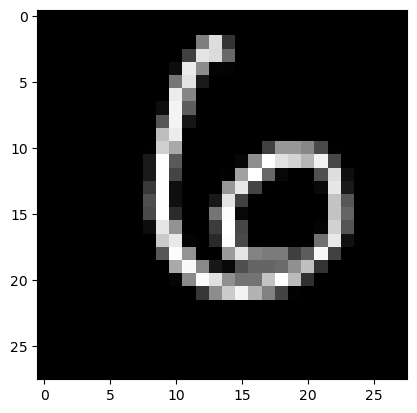

In [67]:
# 1 To deploy the model on a sample image from the validation dataset, we will get a sample tensor
n=100
x= X_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0], cmap="gray")

torch.Size([1, 28, 28])

In [68]:
# 2 Then, we will preprocess the tensor:
# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)

# convert to torch.float32
x=x.type(torch.float)

# move to cuda device
x=x.to(device)

# 3 Next, we will get the model prediction:
# get model output
output=_model(x)

# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print (pred.item(),y.item())

6 6


### **How it works**

First, we developed a helper function to compute the **loss and metric value per mini-batch**. The `opt` argument of the function **refers to the optimizer**. **If given, the gradients are computed and the model parameters are updated per mini-batch**.

Next, we developed a helper function to compute a **performance metric**. The performance metric can be defined depending on the task. Here, we chose the accuracy metric for our classification task. We used `output.argmax` to get **the predicted class with the highest probability**.

Next, we defined a helper function to compute the loss and metric values for an entire dataset. We used the data loader object to get mini-batches, feed them to the model, and compute the loss and metrics per mini-batch. We used two running variables to add loss and metric values.

Next, we defined a helper function to train the model for multiple epochs. In each epoch, we also evaluated the model's performance using the validation dataset. Note that we set the model in training and evaluation modes using `model.train()` and `model.eval()`, respectively. Moreover, we used `torch.no_grad()` to stop `autograd` from calculating the gradients during evaluation.

Next, we explored two methods of storing the trained model. In the first method, we stored `state_dict` or model parameters only. Whenever we need the trained model for deployment, we have to create an object of the model, then load the parameters from the file, and then set the parameters to the model. This is the recommended method by PyTorch creators.

In the second method, we stored the model into a file. In other words, we stored both the model and `state_dict` into one file. Whenever we need the trained model for deployment, we need to create an object of the `Net` class. Then, we loaded the model from the file. So, there is no actual benefit of doing this compared to the previous method.

Next, we deployed the model on a sample image of the validation dataset. The sample image shape is `C x H x W`. Thus. we added a new dimension to become `1 x C x H xW`. Then, we converted the tensor type into `torch.float32` and moved it to a CUDA device.

> Make sure that the model and data are hosted on the same device at deployment, otherwise, you will encounter an error.

### **There's more**

Training deep learning models requires developing intuitions. We will introduce other techniques such as early stopping and learning rate schedules to avoid overfitting and improve performance in the next chapter.